In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')
plt.figure(figsize=(6,4))

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [3]:
login_data=pd.read_json('logins.json')
login_data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
login_data.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


Question 1: 
Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,such as daily cycles. If there are data quality issues, please report them.

In [5]:
type(login_data['login_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
range=pd.date_range('1970-01-01 20:00:00','1970-04-13 19:00:00', freq='15T')
ts=pd.Series(np.zeros(len(range)),index=range)
ts.head()

1970-01-01 20:00:00    0.0
1970-01-01 20:15:00    0.0
1970-01-01 20:30:00    0.0
1970-01-01 20:45:00    0.0
1970-01-01 21:00:00    0.0
Freq: 15T, dtype: float64

In [7]:
login_data=login_data.sort_values('login_time')
login_data=login_data.reset_index(drop=True)
login_data.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [8]:
p=0
for i in login_data.index:
    s=ts.index[p]
    e=ts.index[p+1]
    t=login_data['login_time'][i]
    if s<t<e:
        ts[p]=ts[p]+1
    else:
        while(e<t):#increment to the next time
            p=p+1
            s=ts.index[p]
            e=ts.index[p+1]
        ts[p]=ts[p]+1           

In [9]:
ts.head()

1970-01-01 20:00:00    2.0
1970-01-01 20:15:00    6.0
1970-01-01 20:30:00    9.0
1970-01-01 20:45:00    7.0
1970-01-01 21:00:00    1.0
Freq: 15T, dtype: float64

In [10]:
ts.tail()

1970-04-13 18:00:00    5.0
1970-04-13 18:15:00    2.0
1970-04-13 18:30:00    7.0
1970-04-13 18:45:00    6.0
1970-04-13 19:00:00    0.0
Freq: 15T, dtype: float64

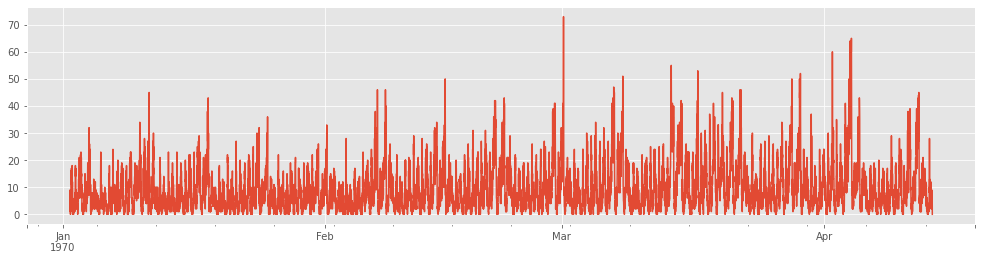

In [11]:
plt.figure(figsize=(17,4))
ts.plot()

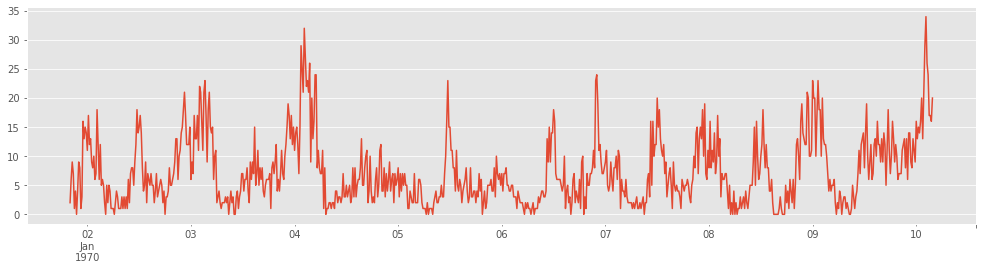

In [12]:
plt.figure(figsize=(17,4))
ts[0:800].plot()

#### The small peaks are appromimately 12 hours gap.

In [13]:
print(ts.max())
print(ts[ts==73].index[0].dayofweek)

73.0
6



The largest peak over all was a Sunday. And, for the first couple months that trend holds true (that activity peaks on the weekends and is low earlier in the week). However, the last month is much more random for peak activity - although the weekends are still consistently busy.

In [14]:
print(len(ts)/96/7)

14.566964285714286


In [15]:
a=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
for i in a:
    print(ts[ts==ts[i*96*7:(i+1)*96*7].max()].index[0].dayofweek)

6
6
6
6
6
5
6
6
6
6
4
5
2
5


### Conclusion:
#### 1. the peaks happen every 12 hours.                                                                                                                                                                            2. for the whole week, the activity generally builds over, peaking on the weekend.


2.The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
I would choose weekend engagement for drivers in the city other than their primary weekday city. With the huge difference in peak times during the weekdays, it is unlikely that any driver would take advantage of both cities as that would equate to working more than 12 hours a day. However, with weekends being active for both throughout the day, it is more reasonable to expect a driver to take customers back and forth with tolls not being an issue.

Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment

b. what statistical test(s) you will conduct to verify the significance of the observation

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Prior to any announcements, I would track drivers' (I'm not sure how large the driver pool is, but tracking all of them initially would be helpful) city habits both on weekdays and weekends. Which cities are they spending the majority of their time, or are they split. Then I would inform all of them (the prior weeks serves as the control and it would be difficult to be sure drivers did not share the information if only a selection were chosen) of the changed toll policy. Again, their trips per city would be tracked. It would be especially noteworthy to note how many times the city location changes per day. I would use a t-test to compare the average number of trips back and forth as well as trips in the non-weekday city. I would also compute an effect size as the number of trips may make it easy to find significance so that we know if the difference is meaningful. If the the effect size is greater than .25 I would then compute an actual cost analysis to see if the cost of the program is outweighed by the extra money brought in. With both of those true I would encourage the policy to be made permanent.

#### 3.Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

#### Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
#### Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

In [16]:
with open('./ultimate_data_challenge.json') as f:
    data = json.load(f)

ultimate_df = pd.DataFrame(data)
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [17]:
ultimate_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [18]:
ultimate_df[['last_trip_date','signup_date']].describe()

,last_trip_date,signup_date
count,50000,50000
unique,182,31
top,2014-06-29,2014-01-18
freq,2036,2948


In [19]:
ultimate_df['last_trip_date'][0]

'2014-06-17'

In [20]:
active_users=[]
for i in ultimate_df.index:
    st=pd.Timestamp(ultimate_df['signup_date'][i])
    et=st+pd.Timedelta('181D')
    at=et-pd.Timedelta('30D')
    if at<=pd.Timestamp(ultimate_df['last_trip_date'][i])<=et:
        active_users.append([1])
    else:
        active_users.append([0])

In [21]:
df1=pd.DataFrame(active_users, columns=['active_users'])
df1['active_users'].value_counts()

0    37802
1    12198
Name: active_users, dtype: int64

In [22]:
print(df1.head())
print(df1.describe())

   active_users
0             0
1             0
2             0
3             1
4             0
       active_users
count  50000.000000
mean       0.243960
std        0.429473
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


In [23]:
ultimate_df['active_users']=df1['active_users']
print(ultimate_df.head())

   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  active_users  
0                       4                 True         46.2             0  
1                 

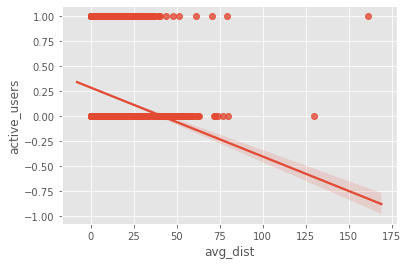

In [24]:
#Continuous Data
sns.regplot(y=df1['active_users'], x=ultimate_df['avg_dist'], fit_reg=True)

### Conclusion 1: The longer of the average distance, the less possible for the driver to be active driver.

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'active_users'],
      dtype='object')

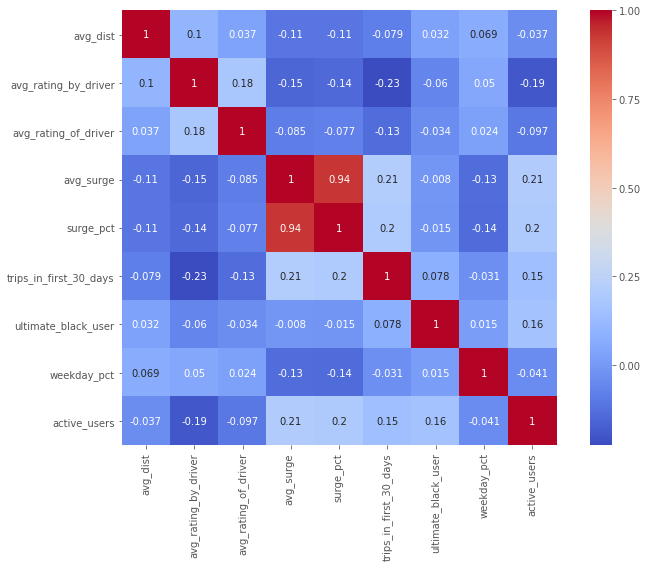

In [25]:
corr=ultimate_df.corr(method='kendall')
plt.figure(figsize=(12,8))
ax=sns.heatmap(corr, annot=True, cmap='coolwarm',square=True,fmt='.2g',xticklabels='auto', yticklabels='auto')
ax.set_ylim([9,0])
ultimate_df.columns

### Conclusion 2: 
#### a. The strong corrrelaiton includes: the active_users has positive correlation with 'avg_surge' (corr=0.21), with 'surge_pct'(corr=0.2), with 'trips_in_first_30_days'(corr=0.15) and with 'ultimate_black_user'(corr=0.16).
#### b. the active_users has negative correlation with 'avg_rating_by_driver (corr=-0.19).

In [26]:
###Categorical data
df=ultimate_df.drop(['avg_rating_of_driver', 'avg_surge','surge_pct','last_trip_date','signup_date','weekday_pct'], \
                    axis = 1)
print(df.head())
print(df.describe())

   avg_dist  avg_rating_by_driver            city    phone  \
0      3.67                   5.0  King's Landing   iPhone   
1      8.26                   5.0         Astapor  Android   
2      0.77                   5.0         Astapor   iPhone   
3      2.36                   4.9  King's Landing   iPhone   
4      3.13                   4.9      Winterfell  Android   

   trips_in_first_30_days  ultimate_black_user  active_users  
0                       4                 True             0  
1                       0                False             0  
2                       3                False             0  
3                       9                 True             1  
4                      14                False             0  
           avg_dist  avg_rating_by_driver  trips_in_first_30_days  \
count  50000.000000          49799.000000            50000.000000   
mean       5.796827              4.778158                2.278200   
std        5.707357              0.446652 

In [27]:
ub_active=pd.crosstab(index=df['active_users'], 
                     columns=df['ultimate_black_user'],
                     margins=True)
ub_active.columns=['Not Ultimate Black', 'Is Ultimate Black', 'rowtotal']
ub_active.index=['Not Active', 'Is Active', 'coltotal']
ub_active

,Not Ultimate Black,Is Ultimate Black,rowtotal
Not Active,25204,12598,37802
Is Active,5942,6256,12198
coltotal,31146,18854,50000


### Conclusion 3:
#### More than half of active users are ultimate black and less than 40% of overal users are ultimate black users, which inidcates it is a sginificant jump in frequency.

In [28]:
#Table of phone type vs active
phone_active = pd.crosstab(index=df["active_users"], 
                            columns=df["phone"],
                             margins=True)   # Include row and column totals

phone_active.columns = ["Android","iPhone","rowtotal"]
phone_active.index= ["Not Active","Is Active","coltotal"]

phone_active

,Android,iPhone,rowtotal
Not Active,13096,24394,37490
Is Active,1926,10188,12114
coltotal,15022,34582,49604


### Conclusion 4:
#### Android users are 30% of the total users, however, they only make up 15% of active users. The phone type can be one indicator.

### Build the predictive model

In [29]:
#import the modules
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(['Astapor',"King's Landing", 'Winterfell'])
LE=preprocessing.LabelEncoder()
LE.fit(['iPhone','Android'])

LabelEncoder()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
city                      50000 non-null object
phone                     49604 non-null object
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
active_users              50000 non-null int64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 2.3+ MB


In [31]:
df_drop=df.dropna()
df_drop['active_users'].value_counts()

0    37314
1    12092
Name: active_users, dtype: int64

In [32]:
df=df.dropna()
df=df.reset_index(drop=True)

In [33]:
c1=le.transform(df['city'])
c2=LE.transform(df['phone'])

In [34]:
df2 = pd.DataFrame(c1,columns = ['city#']) # add them to the dataframe
df3 = pd.DataFrame(c2, columns = ['phone#'])
df = pd.concat([df,df2,df3],axis =1 )

In [35]:
df=df.drop(['city', 'phone'], axis=1)

In [36]:
df['ultimate_black_user']=df['ultimate_black_user'].astype(int)
df.head()

,avg_dist,avg_rating_by_driver,trips_in_first_30_days,ultimate_black_user,active_users,city#,phone#
0,3.67,5.0,4,1,0,1,1
1,8.26,5.0,0,0,0,0,0
2,0.77,5.0,3,0,0,0,1
3,2.36,4.9,9,1,1,1,1
4,3.13,4.9,14,0,0,2,0


In [37]:
#splitting into features and target
y = df['active_users']
X = df[['avg_dist', 'avg_rating_by_driver','trips_in_first_30_days', 'city#', 'phone#','ultimate_black_user']]

In [38]:
#Import necessary modules
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=42)
#create the classifier
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
#compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14631   327]
 [ 4277   528]]
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     14958
           1       0.62      0.11      0.19      4805

    accuracy                           0.77     19763
   macro avg       0.70      0.54      0.53     19763
weighted avg       0.74      0.77      0.70     19763



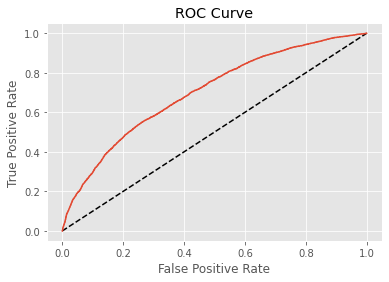

In [43]:
#Draw roc curve
from sklearn.metrics import roc_curve
y_pred_prob=logreg.predict_proba(X_test)[:, 1]
#Produce ROC curve value
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
#Plot ROC curve
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
print('AUC:{}'. format(roc_auc_score(y_test, y_pred_prob)))
cv_auc=cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print('AUC scores computed using 5-fold cross-validation:{}'.format(cv_auc))

AUC:0.7014284394500926
AUC scores computed using 5-fold cross-validation:[0.70162605 0.69694391 0.69409439 0.70094958 0.7081886 ]


In [47]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.7665465897038551


In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ImportError: cannot import name 'PY3' from 'xgboost.compat' (/anaconda3/lib/python3.7/site-packages/xgboost/compat.py)

In [55]:
seed=7
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.33, random_state=seed)
model=XGBClassifier()
model.fit(X_train, y_train)

NameError: name 'XGBClassifier' is not defined

In [56]:
feat_imp=pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

NameError: name 'model' is not defined

In [57]:
#Make prediction for test data
y_pred=model.predict(X_test)
predictions=[round(value) for value in y_pred]
#Evaluate predictions
accuracy=accuracy_score(y_test, predictions)
print('Accuracy:%.2f%%'%(accuracy*100))

NameError: name 'model' is not defined

#### Conclusion 5: The XGBClassifier accuracy is 76.68%
### Summary:
#### 1. In this analysis, we determine the number of active users (24%).
#### 2. We find that the longer of the average distance, the less possible for the driver to be active driver. It indicates that users who use the service for local, smaller trips are most likely to engage frequently and remain active.
#### 3. We find that android users are 30% of the total users, however, they only make up 15% of active users. Iphone users has bettwer app experience and imporve android app will help.
#### 3. Our model is about 78% accurate. One way to improve the accuracy is to normalize the features to minimize the bias from different scales.

### End